<p>&emsp;&emsp;For this notebook to output the desiderata without any modifications, some assumptions have to be satisfied.</p>

<p>&emsp;&emsp;One must <i>exactly</i> conform to my Git hierarchy. It would be optimal to clone the repository to the local machine. Then, place <span style="color:green">'on.npz'</span> and <span style="color:green">'off.npz'</span> directly into the <span style="color:blue">'data/'</span> directory. Finally, place the <span style="color:blue">'thermal/'</span>  directory in the <span style="color:blue">'data/'</span>  directory as well (make sure to remove all tag files). <p>

In [2]:
# Convenient one-liner to import all of the modules that I have written.
%run synthesis

In [3]:
# I have included this variable which you can switch if
# my implementation does not run properly on your machine.
tax_CPU = True

In [4]:
# Both branches should output the same results.
# However, the logic may be easier to follow in the else-statement.

if tax_CPU:
    # This approach is more memory efficient: because we pass the loaded data
    # directly into the reduction function, Python's automated garbage
    # collection will clear the 600 MiB out of ram.
    
    cal_on_median = reduce_raw(load_saves('data/on.npz')['raw_on'], samples_median)
    
    cal_on_mean = reduce_raw(load_saves('data/on.npz')['raw_on'], samples_mean)
    
    cal_off_median = reduce_raw(load_saves('data/off.npz')['raw_off'], samples_median)
    
    cal_off_mean = reduce_raw(load_saves('data/off.npz')['raw_off'], samples_mean)
else:
    # This approach is more CPU efficient, because we load saves
    # half as many times. However, the data sticks around in the shell,
    # occupying space in RAM.
    
    cal_on_raw = load_saves('data/on.npz')['raw_on']
    cal_on_mean = reduce_raw(on_raw, samples_mean)
    cal_on_median = reduce_raw(on_raw, samples_median)
    
    cal_off_raw = load_saves('data/off.npz')['raw_off']
    cal_off_mean = reduce_raw(off_raw, samples_mean)
    cal_off_median = reduce_raw(off_raw, samples_median)

In [5]:
# Generate the x axis for all power plots
# We are sampling at about 10.42 MHz, and each sample contains 16000 points.
x = freq_range(62.5e6 / 6, 16000) / 10 ** 6
# The divisor converts from Hz to MHz

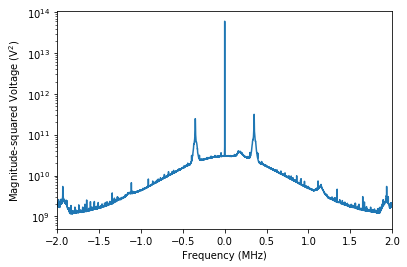

In [6]:
# Since we expect our filter to work, we can focus on frequencies
# within 2 MHz of the zero frequency -> xBounds = (-2, 2).
pp_skeleton(x, cal_on_mean, (-2, 2), logv=True)

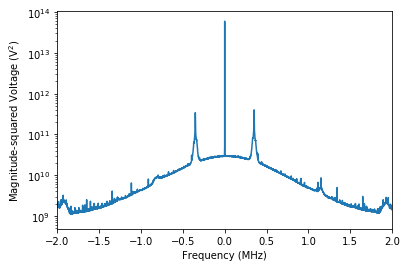

In [7]:
pp_skeleton(x, cal_off_mean, (-2, 2), logv=True)

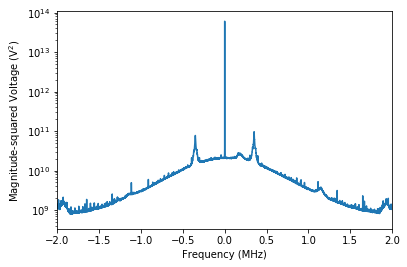

In [8]:
pp_skeleton(x, cal_on_median, (-2, 2), logv=True)

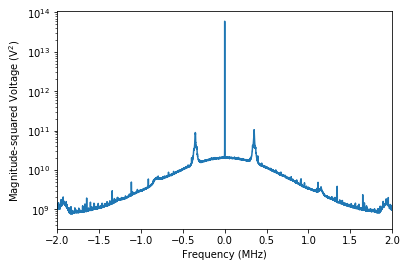

In [9]:
pp_skeleton(x, cal_off_median, (-2, 2), logv=True)

The next three lines navigate to the data directory, extract the data, then navigate back to the home (it is important to return the shell to its initial state; otherwise the notebook will behave inconsistently).

In [10]:
cd data/thermal

C:\Users\Lukas\Documents\GitHub\AY121\lab2\data\thermal


In [11]:
T = thermal()

In [12]:
cd ../..

C:\Users\Lukas\Documents\GitHub\AY121\lab2


In [13]:
T_mean = reduce_raw(T, samples_mean, 800000)
T_median = reduce_raw(T, samples_median, 800000)

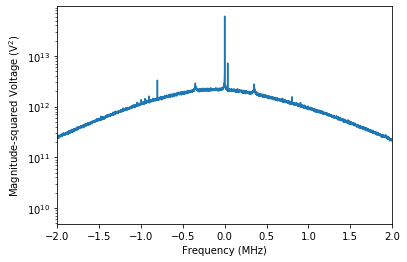

In [14]:
pp_skeleton(x, T_mean, (-2, 2), logv=True)

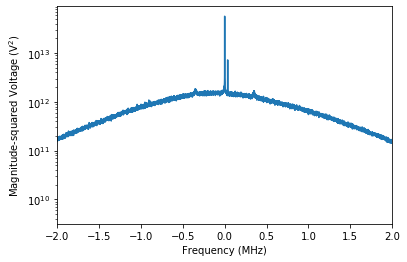

In [15]:
pp_skeleton(x, T_median, (-2, 2), logv=True)

In [16]:
if tax_CPU:
    cass_on_median = reduce_raw(load_saves('data/cass_on.npz')['raw_on'], samples_median)
    
    cass_on_mean = reduce_raw(load_saves('data/cass_on.npz')['raw_on'], samples_mean)
    
    cass_off_median = reduce_raw(load_saves('data/cass_off.npz')['raw_off'], samples_median)
    
    cass_off_mean = reduce_raw(load_saves('data/cass_off.npz')['raw_off'], samples_mean)
else: 
    cass_on_raw = load_saves('data/cass_on.npz')['raw_on']
    cass_on_mean = reduce_raw(cass_on_raw, samples_mean)
    cass_on_median = reduce_raw(cass_on_raw, samples_median)
    
    cass_off_raw = load_saves('data/cass_off.npz')['raw_off']
    cass_off_mean = reduce_raw(cass_off_raw, samples_mean)
    cass_off_median = reduce_raw(cass_off_raw, samples_median)

In [17]:
x = freq_range(62.5e6 / 6, 16000) / 10 ** 6

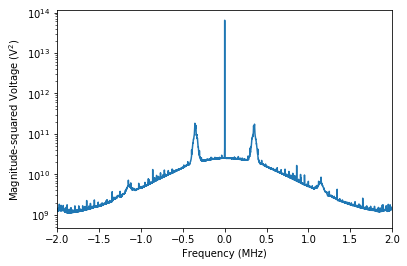

In [18]:
pp_skeleton(x, cass_on_mean, (-2, 2), logv=True)

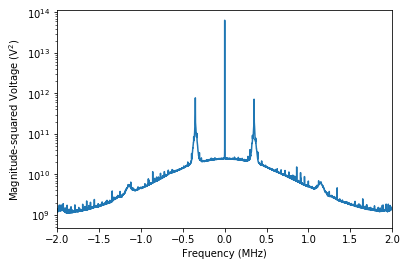

In [19]:
pp_skeleton(x, cass_off_mean, (-2, 2), logv=True)

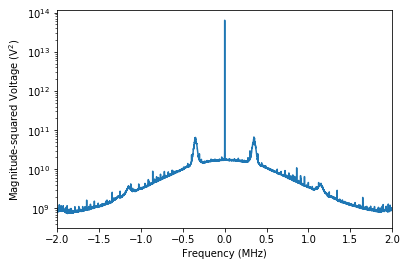

In [20]:
pp_skeleton(x, cass_on_median, (-2, 2), logv=True)

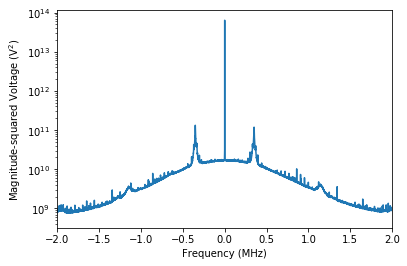

In [21]:
pp_skeleton(x, cass_off_median, (-2, 2), logv=True)